In [1]:
%matplotlib inline

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rc
from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MiniBatchKMeans, SpectralClustering

In [131]:
font = {
    'family' : 'monospace',
}

rc('font', **font)

# kMeans

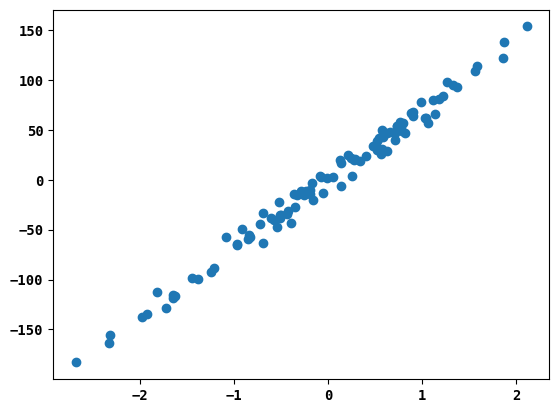

In [132]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=8)

plt.scatter(x, y)
plt.show()

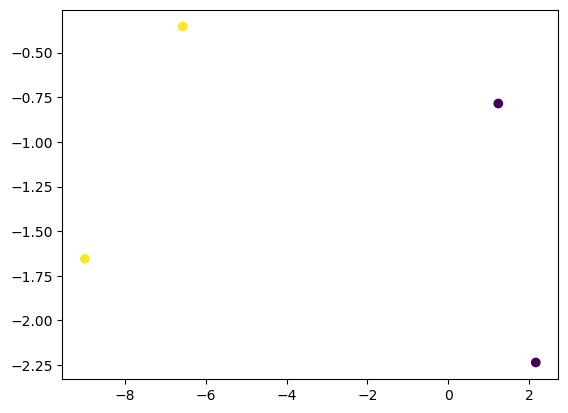

In [4]:
attributes, labels = datasets.make_blobs(n_features=2, n_samples=4, centers=2)

plt.scatter(attributes[:, 0], attributes[:, 1],  c=labels)
plt.show()

In [5]:
attributes, labels = datasets.make_blobs(n_features=2, n_samples=4, centers=2, )

model = KMeans(n_clusters=2)
model.fit(attributes)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

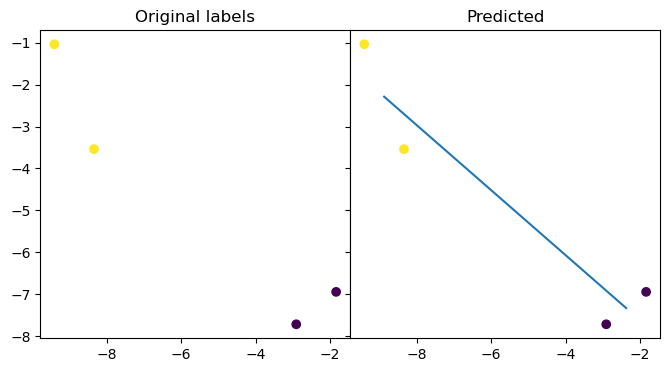

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

ax1.scatter(attributes[:, 0], attributes[:, 1],  c=labels)
ax1.set_title('Original labels')

ax2.scatter(attributes[:, 0], attributes[:, 1],  c=model.predict(attributes))
ax2.plot(*model.cluster_centers_.T, )
ax2.set_title('Predicted')

plt.subplots_adjust(wspace=0)
plt.show()

In [7]:
model.inertia_

4.573412951666889

### What the model sees vs what is generated

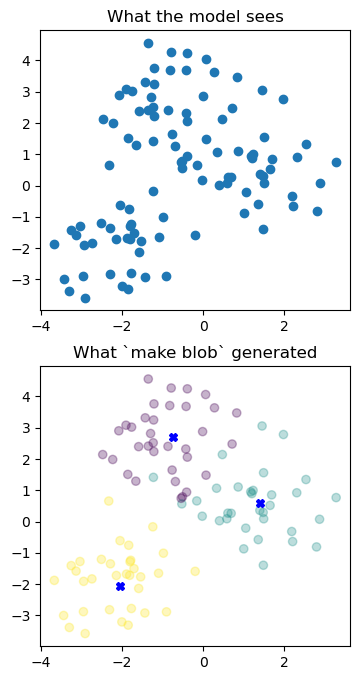

In [26]:
data, classes, centers = datasets.make_blobs(center_box=(-3.0, 3.0), cluster_std=1, return_centers=True, random_state=42)

plt.figure(figsize=(4, 8))
plt.subplot(211)
plt.scatter(data[:, 0], data[:, 1])
plt.title('What the model sees')

plt.subplot(212)
plt.scatter(data[:, 0], data[:, 1], c=classes, alpha=0.3)
plt.plot(centers[:, 0], centers[:, 1], 'bX')
plt.title('What `make blob` generated')
plt.show()

### Predict using Kmeans++

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


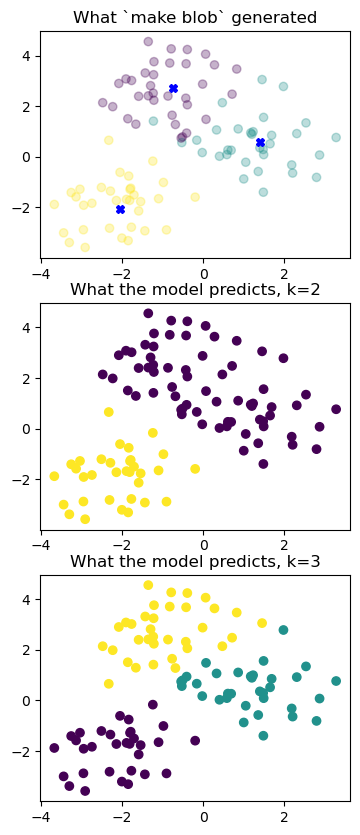

In [33]:
plt.figure(figsize=(4, 10))

plt.subplot(311)
plt.scatter(data[:, 0], data[:, 1], c=classes, alpha=0.3)
plt.plot(centers[:, 0], centers[:, 1], 'bX')
plt.title('What `make blob` generated')

plt.subplot(312)
model = KMeans(n_clusters=2, init='k-means++')
predicted = model.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=predicted)
plt.title('What the model predicts, k=2')

plt.subplot(313)
model = KMeans(n_clusters=3)
assigned = model.fit_predict(data)
plt.scatter(data[:, 0], data[:, 1], c=assigned)
plt.title('What the model predicts, k=3')

plt.show()

### Count the misclassified points

In [68]:
def normalize_labels(lablels_list):
    """
    Replaces the unique values with indexes in order of appearance.
    """
    i = 0
    mapper = {}
    result = []
    for el in lablels_list:
        if el not in mapper:
            mapper[el] = i
            i += 1
        result.append(mapper[el])

    if not type(result) == np.ndarray:
        result = np.array(result)
    
    return result

# Test
dummy_labels = [1, 0, 0, 1, 2, 2, 0, 1]
normalize_labels(dummy_labels)

array([0, 1, 1, 0, 2, 2, 1, 0])

In [94]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++')

predicted = model.fit_predict(data)
predicted = normalize_labels(predicted)

actual = normalize_labels(classes)

missclassified = np.where(predicted != actual)[0]

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


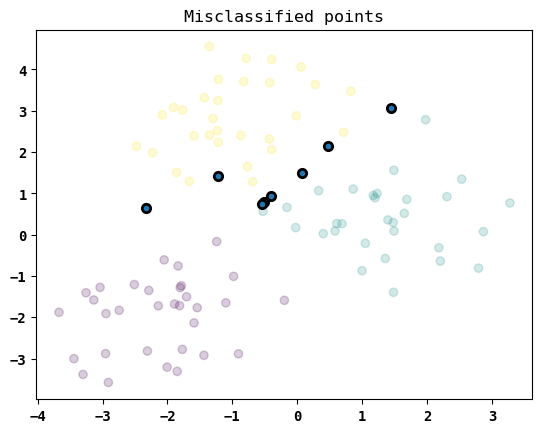

In [133]:
plt.scatter(data[:, 0], data[:, 1], c=actual, alpha=0.2)
plt.plot(
    data[missclassified, 0],
    data[missclassified, 1],
    linestyle='none',
    marker='o',
    markeredgecolor='black',
    markeredgewidth=2,
)
plt.title('Misclassified points')
plt.show()

In [119]:
actual[missclassified]

array([1, 2, 0, 1, 2, 2, 2, 1])

### Elbow method

In [ ]:
inertias = [] 
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(data)
    inertias.append(km.inertia_)

Elbow point is at x = 3 (meaning 3 clusters):

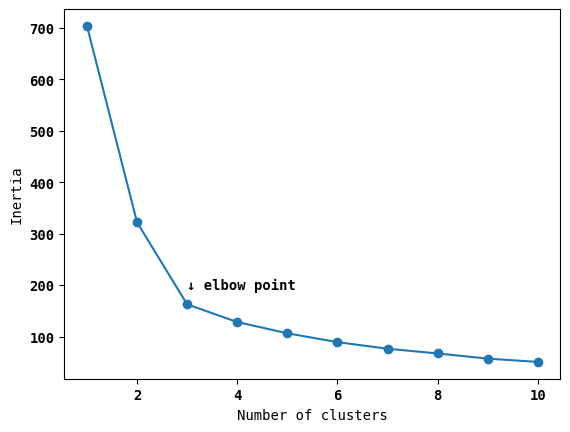

In [152]:
plt.plot(range(1,11), inertias, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.annotate(text='↓ elbow point', xy=(3, inertias[3]), xytext=(3, 1.5 * inertias[3]))
plt.show()

## Silhouette analysis

In [ ]:
from sklearn.metrics import silhouette_samples

## Diabetes

In [153]:
from sklearn.datasets import load_diabetes

In [156]:
diabetes = load_diabetes()

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [158]:
diabetes.data.shape

(442, 10)

In [160]:
diabetes_data = diabetes.data

In [161]:
range_n_clusters = np.arange(2,11)

for n_clusters in range_n_clusters:
    km = KMeans(
        n_clusters=n_clusters,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=42,
    )
    km.

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [162]:
km = KMeans(
        n_clusters=2,
        init='k-means++',
        n_init=10,
        max_iter=300,
        tol=0.0001,
        random_state=42,
    )

predicted_classes = km.fit_predict(diabetes_data)

C:\Users\a1056968\Anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [165]:
np.array(diabetes.feature_names).reshape(-1, 2)

array([['age', 'sex'],
       ['bmi', 'bp'],
       ['s1', 's2'],
       ['s3', 's4'],
       ['s5', 's6']], dtype='<U3')

In [172]:
x = np.arange(16).reshape(4,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [181]:
a = np.arange(16).reshape(4,4)
b = np.split(a, 2, axis=1)

print('IN:', a, '\n','OUT:', b, sep='\n')

IN:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


OUT:
[array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]]), array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])]


In [182]:
two_column_splits = np.split(diabetes_data, 5, axis=1)
feature_names = diabetes_data.feature_names

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [205]:
n_cols = 3
len_x = 60

x = np.arange(len_x).reshape(5, -1)
indeces = np.arange(n_cols, len(x), n_cols)
np.hsplit(x, indeces)

[array([[ 0,  1,  2],
        [12, 13, 14],
        [24, 25, 26],
        [36, 37, 38],
        [48, 49, 50]]),
 array([[ 3,  4,  5,  6,  7,  8,  9, 10, 11],
        [15, 16, 17, 18, 19, 20, 21, 22, 23],
        [27, 28, 29, 30, 31, 32, 33, 34, 35],
        [39, 40, 41, 42, 43, 44, 45, 46, 47],
        [51, 52, 53, 54, 55, 56, 57, 58, 59]])]